### Packages

In [112]:
import pandas as pd
import os, json
from pathlib import Path
import pickle
import matplotlib.pyplot as plt

In [113]:
pwd

'/Users/fabricemesidor/Documents/Flatiron School/Projects/Final-Project/Hip-Hop-Clusters/Data-Collection/Lyrics'

## What in a json file

In [114]:
#Save all json files that I have in the folder
path_to_json ='/Users/fabricemesidor/Documents/Flatiron School/Projects/Final-Project/Hip-Hop-Clusters/Data-Collection/Lyrics'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
len(json_files)

25470

In [115]:
with open('lyrics_eminem_walkonwaterstanlovethewayyouliesnlmedley.json') as json_file:
    data = json.load(json_file)

In [116]:
data

{'songs': [{'title': 'Walk On Water/Stan/Love The Way You Lie (SNL Medley)',
   'album': None,
   'year': '2017-11-18',
   'lyrics': 'Walk On Water\n\n[Chorus: Skylar Grey]\nI walk on water\nBut I ain\'t no Jesus\nI walk on water\nBut only when it freezes\n\n[Verse 1: Eminem]\nWhy are expectations so high? Is it the bar I set?\nMy arms, I stretch, but I can\'t reach\nA far cry from it, or it\'s in my grasp, but as\nSoon as I grab, squeeze\nI lose my grip like the flyin\' trapeze\nInto the dark I plummet, now the sky\'s blackening\nI know the mark\'s high, butter–\nFlies rip apart my stomach\nKnowin\' that no matter what bars I come with\nYou\'re gonna harp, gripe, and\nThat\'s a hard Vicodin to swallow, so I scrap these\nAs pressure increases like khakis\nI feel the ice cracking, because—\n\n[Chorus: Skylar Grey]\nI walk on water\nBut I ain\'t no Jesus\nI walk on water\nBut only when it freezes\n\n[Verse 2: Eminem]\nIt\'s the curse of the standard\nThat the first of the Mathers discs s

In [46]:
data.keys()

dict_keys(['songs', 'artist'])

In [48]:
data['songs'][0].keys()

dict_keys(['title', 'album', 'year', 'lyrics', 'image'])

In [60]:
data['artist']

'Eminem'

In [12]:
json_files[0]

lyrics_eminem_walkonwaterstanlovethewayyouliesnlmedley.json


In [30]:
test_json = pd.read_json(json_files[876])
print(test_json.artist)
print(test_json.songs[0])

0    Kanye West
Name: artist, dtype: object
{'title': 'Gossip Files', 'album': 'Freshmen Adjustment Vol. 1', 'year': None, 'lyrics': '[Hook 1]\nThey gossiping, it runs the city\nThey don\'t know who watchin them when they comin to get me\nSo I hit the block and bend, do about sixty\nAnd I put my Glocks to them, like blaow, blaow, blaow\n\n[Verse 1]\nI\'m finna get on this TV and put shit down\nI ain\'t finna let these light skinned niggas come back in style\nI\'m finna turn this class clown shit to crazy G\'s\nThey told my Momma I was bipolar, had A.D.D\nI told \'em w-what I wanna do, I wanna be a baller\nThe dream spoilers\'ll fool ya\nHating on you to their mans on the corners\nOld folks said he\'d never make it off the corner\nThey are the virus that corrupts the soul\nThey are the cubic zirconia inside the ten-karat gold\nThat get green on you, when you get green on \'em\nYou gotta wash your hands of \'em, get clean on \'em\nSomebody told me success is the best revenge\nSo they gon

## Working with all json

In [117]:
# I have all my json files saved already in json_files
len(json_files)

25470

In [118]:
# I define my pandas Dataframe with the columns I want to get from the json
tracks_df = pd.DataFrame(columns=['Artist', 'Title', 'Album','Year','Lyrics'])

In [119]:
tracks_df

,Artist,Title,Album,Year,Lyrics


In [120]:
# using an index I'm saving the content of the json files
for index, js in enumerate(json_files):
    with open(os.path.join(path_to_json, js)) as json_file:
        json_text = json.load(json_file)

        Artist = json_text['artist']
        Title = json_text['songs'][0]['title']
        Album = json_text['songs'][0]['album']
        Year = json_text['songs'][0]['year']
        Lyrics = json_text['songs'][0]['lyrics']
        
        # I push a list of data into the dataframe that I created earlier
        tracks_df.loc[index] = [Artist, Title, Album,Year,Lyrics]

In [121]:
# now that we have the pertinent json data in our DataFrame let's look at it
tracks_df.head(25)

,Artist,Title,Album,Year,Lyrics
0,Eminem,Walk On Water/Stan/Love The Way You Lie (SNL M...,None,2017-11-18,Walk On Water\n\n[Chorus: Skylar Grey]\nI walk...
1,Big Pun,You Ain’t a Killer,Capital Punishment,1998-04-28,[Verse 1]\nThe harsh realities of life have ta...
2,50 Cent,Jerk,None,None,[50 Cent]\nNext and 50\n(Uh-huh)\nNext and 50\...
3,Cypress Hill,Ez Come Ez Go,Greatest Hits from the Bong,2006-01-27,[Verse 1 : B-Real]\nI'm in the city of sunshin...
4,Nas,Keep It Raw (Intro),None,2011-01-01,[Intro]\nKeep it raw for ya. No doubt PR. Chec...
5,Nicki Minaj,Up in Flames,Pink Friday: Roman Reloaded - The Re-Up,2012-11-19,[Hook: Rene Rowe & Amoy Levy]\nWe are going up...
6,Xzibit,State Of The Union,Weapons of Mass Destruction,2004-12-14,[applause]\nAnd now a message from the Preside...
7,Nas,No Idea’s Original,The Lost Tapes,2002-09-23,"[Intro]\nUhh, uhh\nUhhh, uhhh, uhhh\n\n[Chorus..."
8,Nicki Minaj,Good Luck*,None,None,"Full lyrics to Nicki Minaj's track ""Good Luck""..."
9,Coolio,C U When U Get There (feat. 40 Thevz) (Bill & ...,None,None,Now I've seen places and faces\nAnd things you...


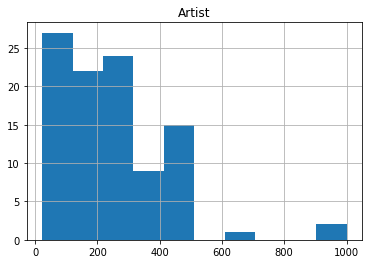

In [122]:
pd.DataFrame(tracks_df.Artist.value_counts()).hist()
plt.show()

In [123]:
with open('../../Data-Cleaning/tracks_df.pkl', 'wb') as f:
    pickle.dump(tracks_df, f)